In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle, Patch
from matplotlib.lines import Line2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
dataset_dir = '../PySpark/ETL_result'
dir_contents = os.listdir(dataset_dir)
dir_contents.sort()
for f in dir_contents:
	print(f) if f.endswith('.csv') else None

part-00000-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00001-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00002-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00003-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00004-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00005-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00006-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00007-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv


In [4]:
twitter_col = ['account_id', 'followers_count', 'following_count', \
    'post_count', 'listed_count', 'active_date']
df = pd.DataFrame(columns = twitter_col)

for f in dir_contents:
    if f.endswith('.csv'):
        df1 = pd.read_csv(dataset_dir + '/' + f, names = twitter_col)
        df = pd.concat([df, df1])        

In [5]:
df

,account_id,followers_count,following_count,post_count,listed_count,active_date
0,5.863300e+04,4155.0,4395.0,12823,72,2470.0
1,6.045300e+04,438.0,757.0,515,9,2448.0
2,7.237300e+04,4295.0,4728.0,16282,166,2469.0
3,6.587230e+05,559.0,15.0,5991,25,2443.0
4,7.908860e+05,877.0,415.0,11320,42,2408.0
...,...,...,...,...,...,...
8083,1.716944e+09,4.0,84.0,51,0,22.0
8084,1.716982e+09,0.0,14.0,2,0,16.0
8085,1.717004e+09,7.0,23.0,29,0,27.0
8086,1.717025e+09,2.0,24.0,10,0,15.0


In [6]:
df.isnull().sum()

account_id         50
followers_count     3
following_count     4
post_count          2
listed_count        1
active_date        81
dtype: int64

In [7]:
df.dropna(subset = ['account_id'], inplace=True)
df.isnull().sum()

account_id          0
followers_count     0
following_count     0
post_count          0
listed_count        0
active_date        47
dtype: int64

In [8]:
df['active_date'].fillna(df['active_date'].mean(), inplace=True)
df.isnull().sum()

account_id         0
followers_count    0
following_count    0
post_count         0
listed_count       0
active_date        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134978 entries, 0 to 8087
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   account_id       134978 non-null  float64
 1   followers_count  134978 non-null  float64
 2   following_count  134978 non-null  float64
 3   post_count       134978 non-null  object 
 4   listed_count     134978 non-null  object 
 5   active_date      134978 non-null  float64
dtypes: float64(4), object(2)
memory usage: 7.2+ MB


In [10]:
features = df.iloc[:,1:]
features

,followers_count,following_count,post_count,listed_count,active_date
0,4155.0,4395.0,12823,72,2470.0
1,438.0,757.0,515,9,2448.0
2,4295.0,4728.0,16282,166,2469.0
3,559.0,15.0,5991,25,2443.0
4,877.0,415.0,11320,42,2408.0
...,...,...,...,...,...
8083,4.0,84.0,51,0,22.0
8084,0.0,14.0,2,0,16.0
8085,7.0,23.0,29,0,27.0
8086,2.0,24.0,10,0,15.0


In [11]:
norm_df = MinMaxScaler().fit_transform(features)
norm_df = pd.DataFrame(norm_df, columns = list(features.columns))
norm_df

,followers_count,following_count,post_count,listed_count,active_date
0,0.002965,0.014794,0.053798,1.849950e-16,1.000000
1,0.000313,0.002548,0.002161,2.312437e-17,0.991093
2,0.003065,0.015915,0.068310,4.265162e-16,0.999595
3,0.000399,0.000050,0.025135,6.423436e-17,0.989069
4,0.000626,0.001397,0.047492,1.079137e-16,0.974899
...,...,...,...,...,...
134973,0.000003,0.000283,0.000214,0.000000e+00,0.008907
134974,0.000000,0.000047,0.000008,0.000000e+00,0.006478
134975,0.000005,0.000077,0.000122,0.000000e+00,0.010931
134976,0.000001,0.000081,0.000042,0.000000e+00,0.006073


In [12]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134978 entries, 0 to 134977
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   followers_count  134978 non-null  float64
 1   following_count  134978 non-null  float64
 2   post_count       134978 non-null  float64
 3   listed_count     134978 non-null  float64
 4   active_date      134978 non-null  float64
dtypes: float64(5)
memory usage: 5.1 MB


In [13]:
# fitting multiple k-means algorithms
# sum of square distances. insertia
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(norm_df)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

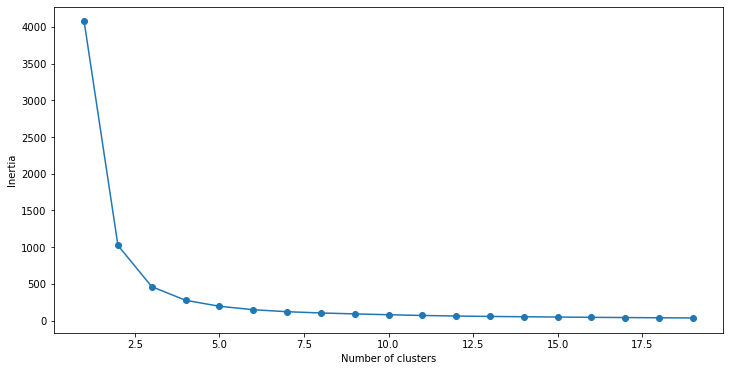

In [14]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [15]:
k = 15
kmeans = KMeans(n_clusters = k, init='k-means++')
kmeans.fit(norm_df)
pred = kmeans.predict(norm_df)
kmeans.inertia_

48.014845499156664

In [16]:
frame = norm_df.copy()
frame['cluster'] = pred
frame['cluster'].value_counts()

0     55828
8     15726
6     11191
3      9028
11     7959
2      7468
7      6192
14     5580
5      4625
1      4295
13     3305
10     2879
9       370
4       345
12      187
Name: cluster, dtype: int64

In [17]:
frame

,followers_count,following_count,post_count,listed_count,active_date,cluster
0,0.002965,0.014794,0.053798,1.849950e-16,1.000000,4
1,0.000313,0.002548,0.002161,2.312437e-17,0.991093,4
2,0.003065,0.015915,0.068310,4.265162e-16,0.999595,4
3,0.000399,0.000050,0.025135,6.423436e-17,0.989069,4
4,0.000626,0.001397,0.047492,1.079137e-16,0.974899,4
...,...,...,...,...,...,...
134973,0.000003,0.000283,0.000214,0.000000e+00,0.008907,0
134974,0.000000,0.000047,0.000008,0.000000e+00,0.006478,0
134975,0.000005,0.000077,0.000122,0.000000e+00,0.010931,0
134976,0.000001,0.000081,0.000042,0.000000e+00,0.006073,0


In [18]:
# find the centers
# centers = np.array(kmeans.cluster_centers_)

In [19]:
# for j in range(0, len(centers)-1):
#     x_features = frame.columns[j]
#     y_features = frame.columns[j+1]

#     sns.lmplot(x = x_features, y = y_features, data = frame, hue = 'cluster', fit_reg = False, height=6)


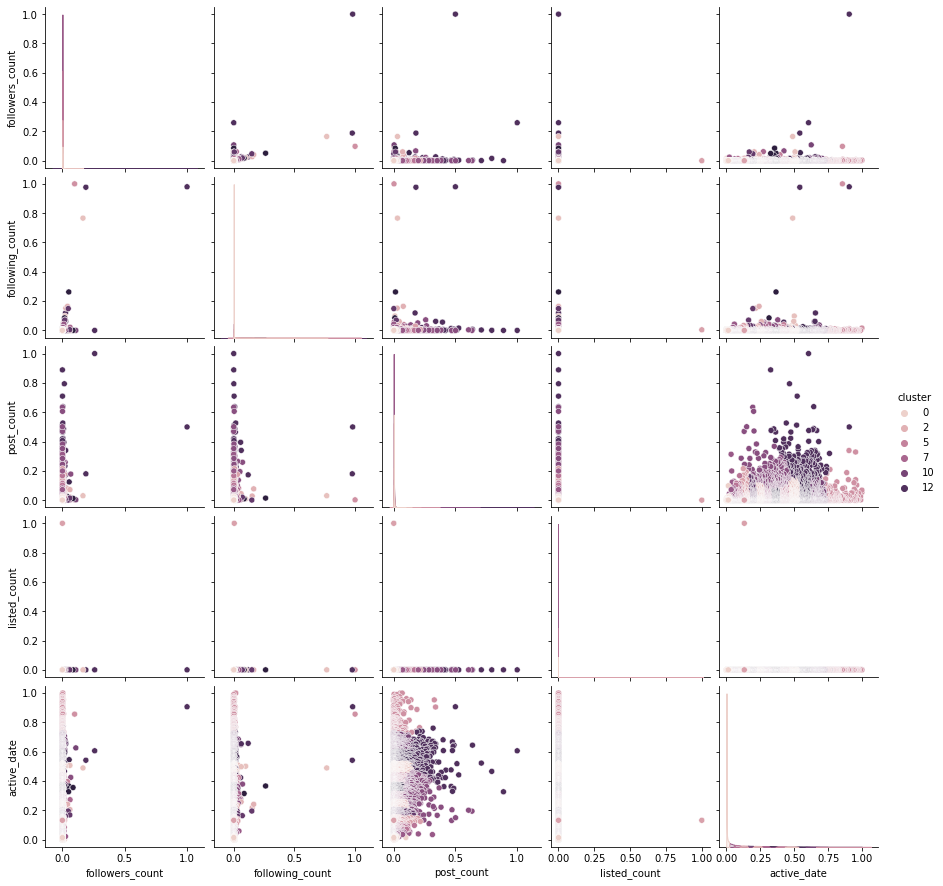

In [20]:
sns.pairplot(frame, hue='cluster')

<AxesSubplot:>

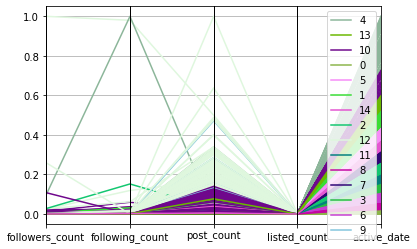

In [29]:
# pd.plotting.parallel_coordinates(frame[:10000], 'cluster')

In [35]:
df

,account_id,followers_count,following_count,post_count,listed_count,active_date
0,5.863300e+04,4155.0,4395.0,12823,72,2470.0
1,6.045300e+04,438.0,757.0,515,9,2448.0
2,7.237300e+04,4295.0,4728.0,16282,166,2469.0
3,6.587230e+05,559.0,15.0,5991,25,2443.0
4,7.908860e+05,877.0,415.0,11320,42,2408.0
...,...,...,...,...,...,...
8083,1.716944e+09,4.0,84.0,51,0,22.0
8084,1.716982e+09,0.0,14.0,2,0,16.0
8085,1.717004e+09,7.0,23.0,29,0,27.0
8086,1.717025e+09,2.0,24.0,10,0,15.0


In [45]:
frame['cluster']

0         4
1         4
2         4
3         4
4         4
         ..
134973    0
134974    0
134975    0
134976    0
134977    0
Name: cluster, Length: 134978, dtype: int32